In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\vishal\OneDrive\Desktop\case study\digital_marketing_campaign_dataset.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [5]:
# Calculate conversion rate if not present
df['CalculateConversionRate'] = (df['Conversion'] / df['WebsiteVisits']) * 100

In [6]:
# Average conversion rate by CampaignChannel
channel_conversion_rate = df.groupby('CampaignChannel')['CalculateConversionRate'].mean()
print(channel_conversion_rate)


CampaignChannel
Email           inf
PPC             inf
Referral        inf
SEO             inf
Social Media    inf
Name: CalculateConversionRate, dtype: float64


In [7]:
# Average conversion rate by AdvertisingPlatform

platform_conversion_rate = df.groupby('AdvertisingPlatform')['CalculateConversionRate'].mean()
print(platform_conversion_rate)

AdvertisingPlatform
IsConfid    inf
Name: CalculateConversionRate, dtype: float64


In [8]:
#A/B Testing
from scipy.stats import ttest_ind

# Split data into groups

group_a = df[df['CampaignType'] == 'TypeA']['Conversion']
group_b = df[df['CampaignType'] == 'TypeB']['Conversion']

In [9]:
# Perform a t-test

t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)
print(f"T-Statistic:{t_stat}, P-Value : {p_value} ")

T-Statistic:nan, P-Value : nan 


C:\Users\vishal\AppData\Local\Temp\ipykernel_16492\2681135177.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group_a, group_b, equal_var=False)


In [10]:
# Interpret results
if p_value < 0.05:
    print("Statistically significant difference between the groups.")
else:
    print("No statistically significant difference between the groups.")

No statistically significant difference between the groups.


In [11]:
df['CalculateConversionRate'].fillna(0, inplace=True)

C:\Users\vishal\AppData\Local\Temp\ipykernel_16492\1884529062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CalculateConversionRate'].fillna(0, inplace=True)


In [12]:
df.head(3)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,CalculateConversionRate
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,inf
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2.380952
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,50.000000


In [13]:
# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)
df = df.select_dtypes(include=['number'])
df = df.dropna()  # Drop rows with missing values
df.fillna(0, inplace=True)


In [14]:
# Identify Best-Performing Features

correlation_matrix = df.corr()
print(correlation_matrix['CalculateConversionRate'].sort_values(ascending=False))

CalculateConversionRate    1.000000
Conversion                 0.196966
EmailOpens                 0.054965
TimeOnSite                 0.049811
EmailClicks                0.034477
AdSpend                    0.029332
ConversionRate             0.029015
ClickThroughRate           0.021137
LoyaltyPoints              0.021109
PagesPerVisit              0.020065
PreviousPurchases          0.012836
Income                     0.005583
Age                       -0.001116
SocialShares              -0.014392
CustomerID                -0.045023
WebsiteVisits             -0.490459
Name: CalculateConversionRate, dtype: float64


In [15]:
#importing library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X = df[['AdSpend', 'ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']]
y= df['Conversion']

In [17]:
# Split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Fit the logistic regression model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
# Feature importance
print("Feature Importance")

for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef}")

Feature Importance
AdSpend: 0.40352374685145687
ClickThroughRate: 0.4265520537545219
WebsiteVisits: 0.29590819542598074
PagesPerVisit: 0.32949414049594744
TimeOnSite: 0.4247415497412371


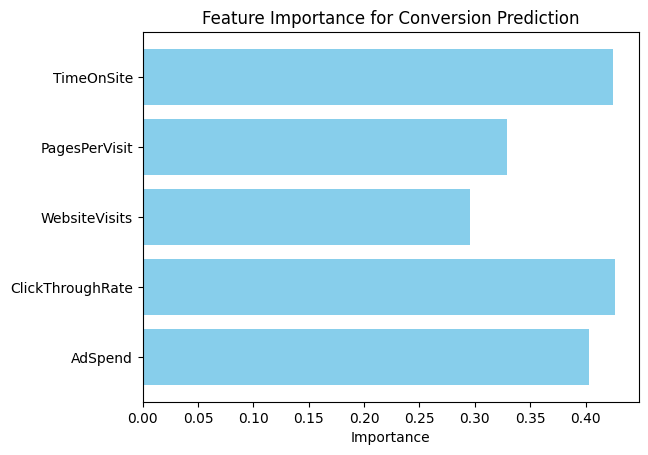

In [21]:
import matplotlib.pyplot as plt

# Plot feature importance
features = ['AdSpend', 'ClickThroughRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']
importance = [0.4035, 0.4266, 0.2959, 0.3295, 0.4247]

plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Conversion Prediction')
plt.show()